In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
import math

%matplotlib inline

In [6]:
def f(x):
    return 3*x**2 - 4*x + 5

In [7]:
f(3)

20

In [8]:
xs = np.arange(-5,5,0.25)

ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

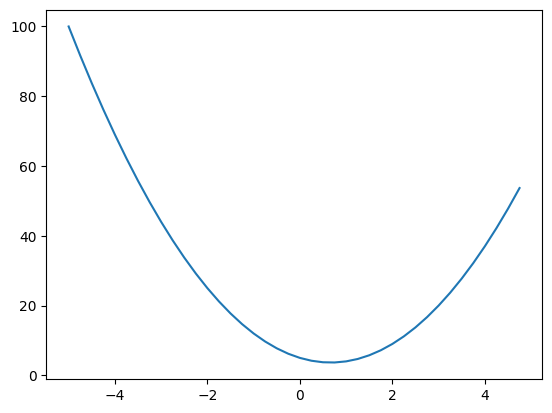

In [9]:
plt.plot(xs,ys)

In [10]:
h = 0.001 
x = 4
f(x + h)

37.020003

In [11]:
(f(x+h) - f(x))/h

20.003000000002658

In [12]:
h = 0.0000001
x = 2/3
(f(x+h) - f(x))/h

2.9753977059954195e-07

In [13]:
# Getting more complex 

a = 10 
b = -4
c = -15

d = a*b - c
d

-25

In [14]:
h = 0.00001

d1 = a*b - c 

a = +h
d2 = a*b -c

print('d1',d1)
print('d2',d2)
print('Slope', (d2-d1)/h)

d1 -25
d2 14.99996
Slope 3999996.0


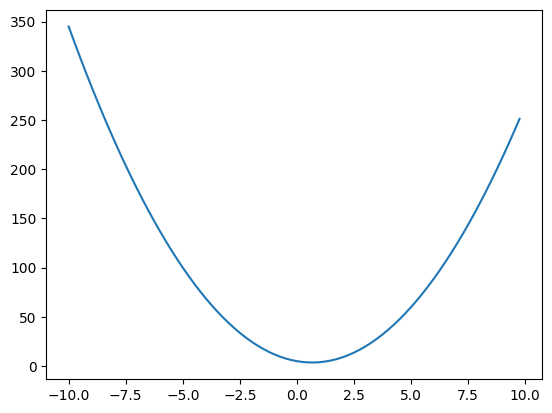

In [15]:
nnnnn = np.arange(-10,10,0.25)

ynnnn = f(nnnnn)

plt.plot(nnnnn,ynnnn)

In [16]:

class Value:
    """ stores a single scalar value and its gradient """

    def __init__(self, data, _children=(), _op=''):
        self.data = data
        self.grad = 0
        # internal variables used for autograd graph construction
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op # the op that produced this node, for graphviz / debugging / etc

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward

        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += (other * self.data**(other-1)) * out.grad
        out._backward = _backward

        return out

    def relu(self):
        out = Value(0 if self.data < 0 else self.data, (self,), 'ReLU')

        def _backward():
            self.grad += (out.data > 0) * out.grad
        out._backward = _backward

        return out

    def backward(self):

        # topological order all of the children in the graph
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        # go one variable at a time and apply the chain rule to get its gradient
        self.grad = 1
        for v in reversed(topo):
            v._backward()

    def __neg__(self): # -self
        return self * -1

    def __radd__(self, other): # other + self
        return self + other

    def __sub__(self, other): # self - other
        return self + (-other)

    def __rsub__(self, other): # other - self
        return other + (-self)

    def __rmul__(self, other): # other * self
        return self * other

    def __truediv__(self, other): # self / other
        return self * other**-1

    def __rtruediv__(self, other): # other / self
        return other * self**-1

    def __repr__(self):
        return f"Value(data={self.data}, grad={self.grad})"

In [17]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += out.data * self.grad
    out._backward = _backward
    
    return out
  
  
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += (other * self.data**(other-1)) * out.grad
        out._backward = _backward

        return out

    def relu(self):
        out = Value(0 if self.data < 0 else self.data, (self,), 'ReLU')

        def _backward():
            self.grad += (out.data > 0) * out.grad
        out._backward = _backward

        return out

 
  
  
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self,), 'exp')
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [18]:
a = Value(2.0,label = 'a')
b = Value(-3.0, label = 'b' )
c = Value(10.0, label = 'c')

d = a*b + c ; d.label = 'd'

e = a*b; e.label = 'e'
f = Value(-2.0,label = 'f')
L= d*f ; L.label = 'L'
L

Value(data=-8.0)

In [19]:
d._op

'+'

In [20]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [21]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


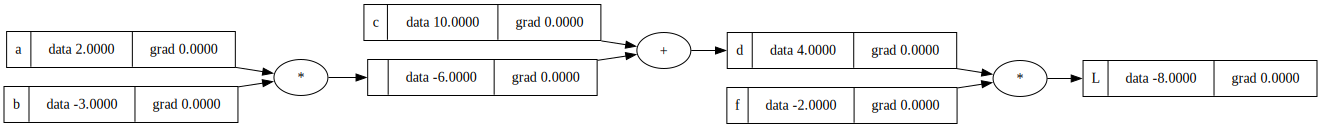

In [22]:
draw_dot(L)

In [23]:
L.grad = 1.0

In [24]:
# create a function to test diff values of l1 l2 

def lol():
    
    h = 0.0001
    a = Value(2.0,label = 'a')
    b = Value(-3.0, label = 'b' )
    c = Value(10.0, label = 'c')

    d = a*b + c ; d.label = 'd'

    e = a*b; e.label = 'e'
    f = Value(-2.0,label = 'f')
    L= d*f ; L.label = 'L'
    L1 = L.data
    
    a = Value(2.0+h,label = 'a')
    b = Value(-3.0, label = 'b' )
    c = Value(10.0, label = 'c')

    d = a*b + c ; d.label = 'd'

    e = a*b; e.label = 'e'
    f = Value(-2.0,label = 'f')
    L= d*f ; L.label = 'L'
    L2 = L.data 
    
    
    print((L2-L1)/h)
    

lol()


6.000000000021544


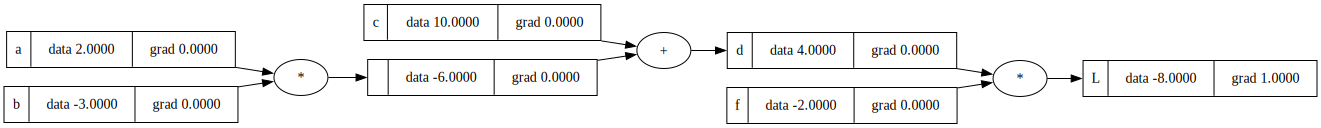

In [25]:
draw_dot(L)

## Need for Chain rule 

dd/dc = 1.0 
dd/de = 1.0 
d = c+ e 

WANT - 
dL/dc = (dL/dd) * (dd/dc)

KNOW:
dL/dd
dd/dc

In [26]:
c.grad = -2.0
e.grad = -2.0 # by symmetry as the operation both go is addition whcih gives 1 


Now for the final node we will apply chain rule that is a * b 

we Know that dL/de = -2.0
now we need to know dL/da
and dL/db


now dL/da = (dL/de) * (de/da)


when performing * in chain rule the values between a and b interchanges so 

dL/de is just -2.00 
de/da is the value of b that is 3



In [27]:
a.grad = (-2 * -3 )
b.grad = (-2 * -2)

Whatever we did till now was manual backpropagation 
The recursive application of chain rule across the nodes of a network 


- We need L to go up in the gradient that is we will tweak each element a b c d e 

Upto some small number 

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

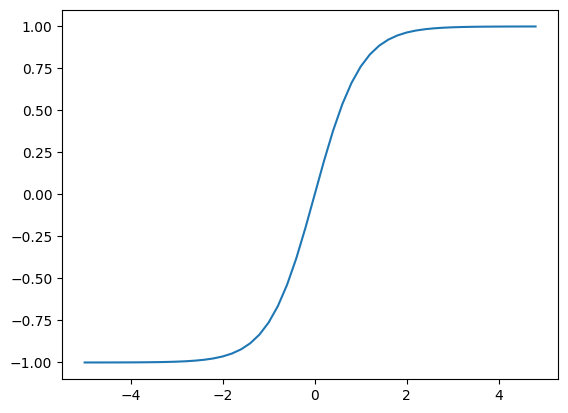

In [28]:
plt.plot(np.arange(-5,5,0.2) , np.tanh(np.arange(-5,5,0.2))) ; plt.grid

In [29]:
#input values are x1,x2 

x1 =Value(2,label='x1')
x2 = Value(0.0,label='x2')

# weights w1 and w2

w1 = Value(-3,label='w1')
w2 = Value(1,label='w2')

#bias 
b = Value(10 , label='b')



x1w1 = x1*w1 ; x1w1.label = 'x1w1'

x2w2 = x2 * w2 ; x1w1.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2 ; x1w1x2w2.label = 'x1w1 + x2w2'


n = x1w1x2w2 + b ; n.label = 'n'
o = n.tanh() ; o.label = '0'



In [30]:
o.grad = 1.0

Introducing a property 
o = tanh(n)

do/dn = 1 - tanh ** 2 

tanh is basically o 

do/dn = 1 - o ** 2



In [31]:
1 - o.data**2

0.0013409506830258655

# Automating Backprop Now 


In [32]:
o.grad = 1.0

In [33]:
o._backward()

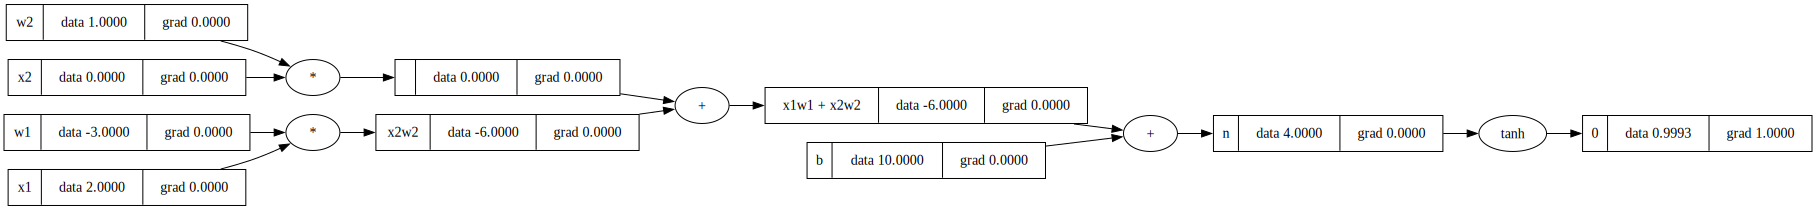

In [34]:
draw_dot(o)

In [35]:
n._backward()

In [36]:
b._backward()

## Topological Sort 

In [37]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo


[Value(data=10),
 Value(data=1),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=2),
 Value(data=-3),
 Value(data=-6),
 Value(data=-6.0),
 Value(data=4.0),
 Value(data=0.999329299739067)]

In [38]:
o.grad = 1 

topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)

for node in reversed(topo):
    node._backward()

In [39]:
o.backward()

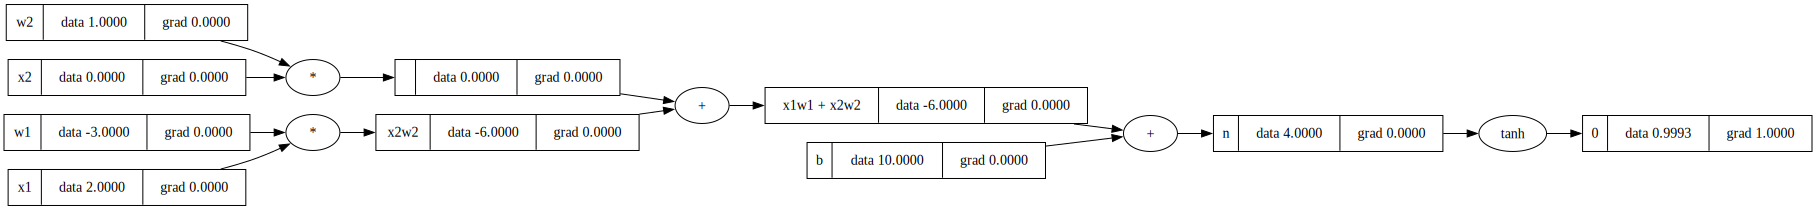

In [40]:
draw_dot(o)

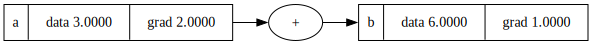

In [41]:
#example 

a = Value(3.0, label='a')
b = a + a ; b.label = 'b'
b.backward()
draw_dot(b)

## Creating The library 

In [44]:

class Module:

    def zero_grad(self):
        for p in self.parameters():
            p.grad = 0

    def parameters(self):
        return []

class Neuron(Module):

    def __init__(self, nin, nonlin=True):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(0)
        self.nonlin = nonlin

    def __call__(self, x):
        act = sum((wi*xi for wi,xi in zip(self.w, x)), self.b)
        return act.relu() if self.nonlin else act

    def parameters(self):
        return self.w + [self.b]

    def __repr__(self):
        return f"{'ReLU' if self.nonlin else 'Linear'}Neuron({len(self.w)})"

class Layer(Module):

    def __init__(self, nin, nout, **kwargs):
        self.neurons = [Neuron(nin, **kwargs) for _ in range(nout)]

    def __call__(self, x):
        out = [n(x) for n in self.neurons]
        return out[0] if len(out) == 1 else out

    def parameters(self):
        return [p for n in self.neurons for p in n.parameters()]

    def __repr__(self):
        return f"Layer of [{', '.join(str(n) for n in self.neurons)}]"

class MLP(Module):

    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1], nonlin=i!=len(nouts)-1) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

    def __repr__(self):
        return f"MLP of [{', '.join(str(layer) for layer in self.layers)}]"

In [47]:
x = [2,3,4]
n = MLP(3, [4,4,1])


AttributeError: 'MLP' object has no attribute '_prev'